This is the HW1 of the subject.

PROBLEM 1

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
from sklearn import metrics

1)

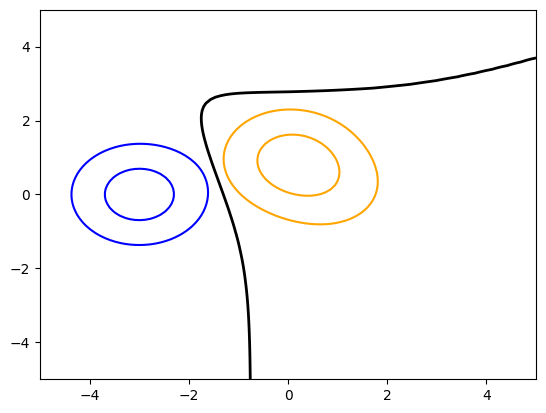

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generative densities parameters
mu1 = np.array([1, 0])
mu2 = np.array([0, 1])
mu3 = np.array([-3, 0])
mu4 = np.array([0, 2])
sigma = np.eye(2)
w1 = 0.3
w2 = 0.7
w3 = 0.8
w4 = 0.2

# Plotting range
x_min = -5
x_max = 5
y_min = -5
y_max = 5

# Calculate Gaussian mixture model for each class
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
pos = np.dstack((x, y))

f1 = w1 * multivariate_normal.pdf(pos, mean=mu1, cov=sigma) + w2 * multivariate_normal.pdf(pos, mean=mu2, cov=sigma)
f2 = w3 * multivariate_normal.pdf(pos, mean=mu3, cov=sigma) + w4 * multivariate_normal.pdf(pos, mean=mu4, cov=sigma)

# Plotting the contour lines
plt.contour(x, y, f1, levels=[0.05, 0.1, 0.5, 1], colors='orange')
plt.contour(x, y, f2, levels=[0.05, 0.1, 0.5, 1], colors='blue')

# Adding the decision boundary
plt.contour(x, y, f1 - f2, levels=[0], colors='black', linewidths=2)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

1) Naive Bayes decision boundary

In [140]:
N = 2 * 1000

def plot_decision_boundaries(X, y, model_class, **model_params):
   
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("X1",fontsize=15)
    plt.ylabel("X2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

We define a generative function for drawing a decision boundary. This function is compatible with all the scikit-learn classification models. Now, the Navie Bayes classification algorithm will be implemented.

2) a) K-NN. k = 15

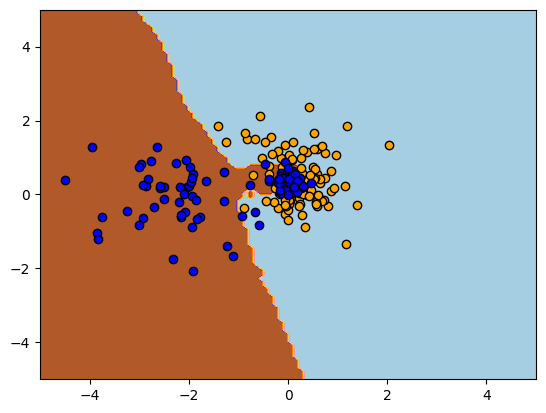

In [141]:
# Generate data for each class
class1_data = np.concatenate([w1 * np.random.multivariate_normal(mean=mu1, cov=sigma, size=50),
                              w2 * np.random.multivariate_normal(mean=mu2, cov=sigma, size=50)], axis=0)
class2_data = np.concatenate([w3 * np.random.multivariate_normal(mean=mu3, cov=sigma, size=50),
                              w4 * np.random.multivariate_normal(mean=mu4, cov=sigma, size=50)], axis=0)

# Concatenate data and labels
data = np.concatenate([class1_data, class2_data], axis=0)
labels = np.concatenate([np.zeros(100), np.ones(100)], axis=0)

# Fit the k-NN model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(data, labels)

# Plotting range
x_min = -5
x_max = 5
y_min = -5
y_max = 5

# Plotting the decision boundary
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='orange', edgecolors='black', marker='o')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='blue', edgecolors='black', marker='o')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

2) b) Using a linear model

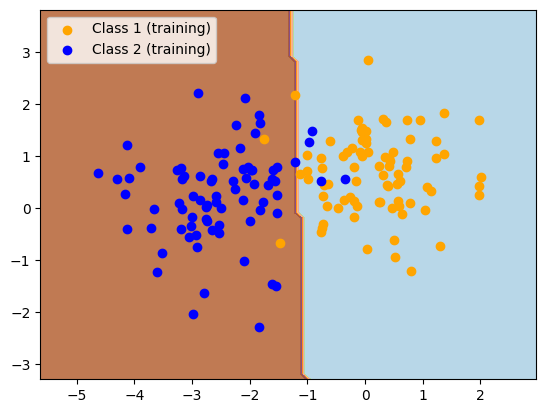

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Generate the data with the given Gaussian mixture models
np.random.seed(0)

mean1 = np.array([1, 0])
mean2 = np.array([0, 1])
mean3 = np.array([-3, 0])
mean4 = np.array([0, 2])
cov = np.identity(2)

class1 = np.random.multivariate_normal(mean1, cov, 100) * 0.3 + np.random.multivariate_normal(mean2, cov, 100) * 0.7
class2 = np.random.multivariate_normal(mean3, cov, 100) * 0.8 + np.random.multivariate_normal(mean4, cov, 100) * 0.2

X = np.concatenate([class1, class2], axis=0)
y = np.concatenate([np.zeros(100), np.ones(100)], axis=0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a linear model on the training data
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='orange', label='Class 1 (training)')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='blue', label='Class 2 (training)')
plt.legend()
plt.show()

Now, we compute the testing in order to get the error.

In [143]:
# Calculating the misclassification error for k-NN
knn_pred_y = knn.predict(X_test)
knn_misclassification_error = np.sum(knn_pred_y != y_test)
print("Misclassification error for k-NN:", knn_misclassification_error)

# Calculating the misclassification error for linear model
lr_pred_y = clf.predict(X_test)
lr_misclassification_error = np.sum(lr_pred_y != y_test)
print("Misclassification error for linear model:", lr_misclassification_error)

error_2a = knn_misclassification_error
error_2b = lr_misclassification_error



Misclassification error for k-NN: 6
Misclassification error for linear model: 2


3) Counting misclassifications

In [144]:
print("ERROR RESULTS\n")
print("Error 2a: ", round(error_2a/200, 3))
print("Error 2b: ", round(error_2b/200, 3))
print("\n")


print("\nTotal number of cases: ", 200)


ERROR RESULTS

Error 2a:  0.03
Error 2b:  0.01



Total number of cases:  200


PROBLEM 3.

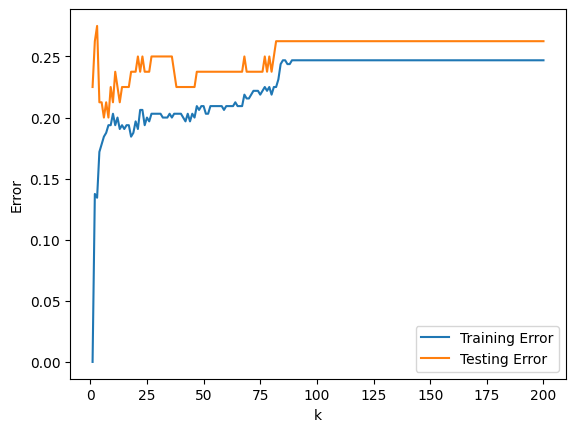

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate data using Gaussian mixture models
np.random.seed(0)
N = 200



class_1_data = np.concatenate([np.random.multivariate_normal(mu1, cov, int(w1*N)), 
                              np.random.multivariate_normal(mu2, cov, int(w2*N))])
class_1_labels = np.concatenate([np.zeros(int(w1*N)), np.ones(int(w2*N))])

class_2_data = np.concatenate([np.random.multivariate_normal(mu3, cov, int(w3*N)), 
                              np.random.multivariate_normal(mu4, cov, int(w4*N))])
class_2_labels = np.concatenate([np.zeros(int(w3*N)), np.ones(int(w4*N))]) + 1

# Combine data and labels
X = np.concatenate([class_1_data, class_2_data])
y = np.concatenate([class_1_labels, class_2_labels])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Calculate training and testing error for different values of k
k_values = range(1, N+1)
train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_preds = knn.predict(X_train)
    test_preds = knn.predict(X_test)
    train_errors.append(1 - accuracy_score(y_train, train_preds))
    test_errors.append(1 - accuracy_score(y_test, test_preds))

# Plot training and testing error
plt.plot(k_values, train_errors, label='Training Error')
plt.plot(k_values, test_errors, label='Testing Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

The testing error maintains quite constant its value, no matter the k number of Nearest Neighbors.

The training error decreases the greater it gets the k number of Nearest Neighbors. As we have seen in class, the greater is the k number, the simpler is the model, therefore, the worse fits the training data, that is why the training error value falls. Nevertheless, for small k number of Nearest Neighbors' values, the model is quite complex and perfectly adapts to the training data. But, this usually brigs about loss of generalization, therefore ending up in overfitting due to the high complexity of the model. 